<h2 style="color:#22198A">PROJECT INFO</h2>

<h3 style="color:green">About project-03</h3>
<p> The goal of this project is to find out if some characteristics of skin lesions can be reliably measured with a <b>smartphone app.</b> The
characteristics the dermatologist is especially interested in are: asymmetry, border and color.</p>
<p><b>Contact:</b> jtih@itu.dk, joap@itu.dk, luci@itu.dk, mnib@itu.dk</p>
<p><b>Created:</b> 06. 04. 2021</p>
<p><b>Last modified:</b> 22. 04. 2021 </p>

<h2 style="color:#22198A">NOTEBOOK SETUP</h2>
<p>Before you start working with the notebook, please make sure to go through this setup to ensure smooth running. (by default, no changes should be needed if you just downloaded the repository)</p>
<h3 style="color:green">Important highlights</h3>
<ul>
<li><b>BASE_DIR:</b> This should lead to the root directory relative to the location of this notebook</li>
<li><b>SCRIPTS IMPORT:</b> All scripts are saved within one file. In the file, there are comments splitting the whole file into sections which gather scripts with similar functionality, e.g. loading data. All functions should contain a docstring, which might be useful for any troubleshooting or just knowing how the given thing was implemented. The way the scripts are imported was implemented according to <a href='# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
'>this</a> SO question. <b>Once you run the below cell, all scripts should be loaded.</b></li>
<li><b>PACKAGES USED WITHIN DIRECTORY: </b> In <b>all_scripts.py</b> you can see in the beginning all the packages used, but it is worth highlight these "not so standard" packages which you should make sure you have installed: <b>pandas, scipy.</b> Altenrnatively, you can also use provided <b>requirements.txt.</b></li>
</ul>

In [ ]:
import os

BASE_DIR = f"..{os.sep}..{os.sep}"
USE_DEEPNOTE = True  # In case you would open this notebook via Deepnote

# SCRIPTS IMPORT
import os
import sys
import time

scripts_path = os.path.abspath(os.path.join(f"{BASE_DIR}scripts"))

if scripts_path not in sys.path:
    # Add the scripts to the path
    sys.path.append(scripts_path)

    # Import the needed scripts
    from all_scripts import *

    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)
else:

    # Import the needed scripts
    from all_scripts import *

    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)

# PLOTS COLOR SETTING - see more here: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
PLOT_COLOR_SETTINGS = sns.color_palette("flare", as_cmap=True)



<h2 style="color:#22198A">CONSTANTS</h2>

In [ ]:
PATH_DATA = {
    "raw": f"{BASE_DIR}data{os.sep}raw{os.sep}",
    "external": f"{BASE_DIR}data{os.sep}external{os.sep}",
    "pictures-examples-raw": f"{os.sep}datasets{os.sep}exampleimages{os.sep}",
    "pictures-segment-raw": f"{os.sep}datasets{os.sep}examplesegmentation{os.sep}"
}

FILENAMES = {
    "ex_ground_truth": "example_ground_truth.csv",
    "ex_features": "features.csv"
}

<h2 style="color:#22198A">LOAD DATA</h2>

In [ ]:
FEATURES_RAW = pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['ex_features']}")
GROUND_TRUTH_RAW = pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['ex_ground_truth']}")

<h2 style="color:#22198A">Task 0: Explore the data</h2>
<h3 style="color:green">Ground truth example</h3>
<h4 style="color:#ff9900">Shape</h4>

In [ ]:
GROUND_TRUTH_RAW.shape

(150, 3)

<h4 style="color:#ff9900">Are there any missing values?</h4>

In [ ]:
GROUND_TRUTH_RAW.isnull().sum()

image_id                0
melanoma                0
seborrheic_keratosis    0
dtype: int64

<h4 style="color:#ff9900">What are the actual values?</h4>
<p>We see that all variables are categorical, therefore we can use a bar plot to visulize them.</p>

In [ ]:
GROUND_TRUTH_RAW

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0001769,0.0,0.0
1,ISIC_0001852,0.0,0.0
2,ISIC_0001871,0.0,0.0
3,ISIC_0003462,0.0,0.0
4,ISIC_0003539,0.0,0.0
...,...,...,...
145,ISIC_0015443,0.0,0.0
146,ISIC_0015445,0.0,0.0
147,ISIC_0015483,0.0,0.0
148,ISIC_0015496,0.0,0.0


<h4 style="color:#ff9900">Visualization of ground truth data</h4>

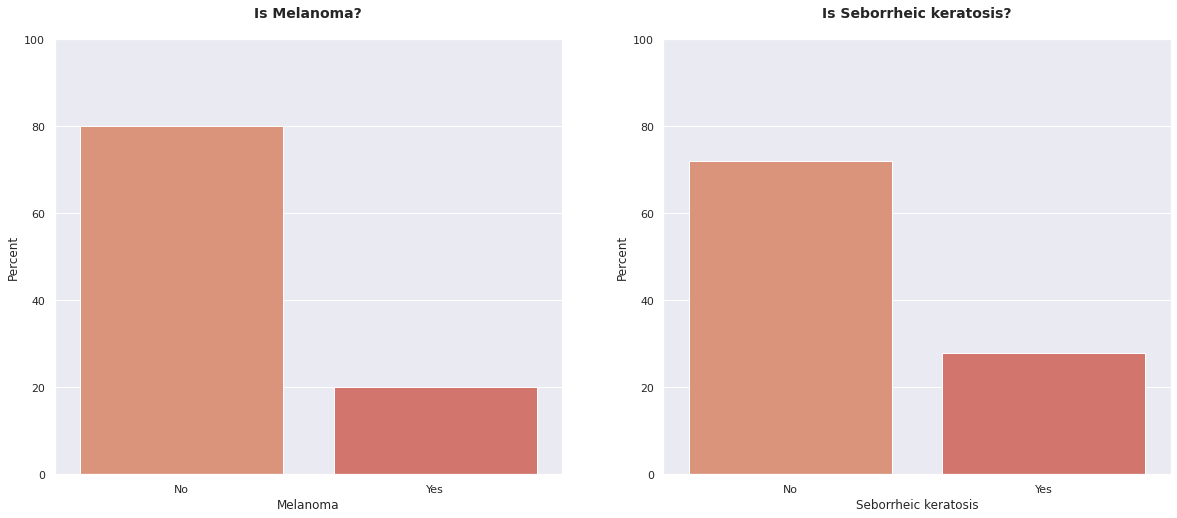

In [ ]:
# Setup figure
sns.set(rc={'figure.figsize':(20,8)})
fig, axs = plt.subplots(1, 2);
fig.subplots_adjust(hspace=1.2) # Adjust the horizontal space between the subplots


# Iterate over selected variables and display their distribution
for ax, var_name in zip(axs, ["melanoma", "seborrheic_keratosis"]):

    # Plot the data - let yaxis be the percentage, inspired from: https://github.com/mwaskom/seaborn/issues/1027
    sns.barplot(x=var_name, y = var_name, data = GROUND_TRUTH_RAW, estimator=lambda x: len(x) / len(GROUND_TRUTH_RAW) * 100, palette = sns.color_palette("flare"), ax = ax)

    # Set y-label
    ax.set_ylabel("Percent")

    # Set y-limit so both graphs are comparable
    ax.set_ylim(0, 100)

    # Set x-ticks labels
    ax.set_xticklabels(["No", "Yes"])

    # Gets rid of underscore in the name - if needed
    var_name = ' '.join(var_name.split('_')).capitalize()

    # Set x-label
    ax.set_xlabel(var_name, size = 12)

    # Set the title
    ax.set_title(f"Is {var_name}?\n", size=14, weight = "bold")

<h3 style="color:green">Features</h3>
<h4 style="color:#ff9900">Shape</h4>

In [ ]:
FEATURES_RAW.shape

(150, 3)

<h4 style="color:#ff9900">Are there any missing values?</h4>

In [ ]:
FEATURES_RAW.isnull().sum()

id           0
area         0
perimeter    0
dtype: int64

<h4 style="color:#ff9900">What are the actual values?</h4>
<p>We see that there are two numerical variables: area, perimiter, we should examine their distribution. Additionally, it is important to notice that we can merge this dataset with ground truth data using id column.</p>

In [ ]:
FEATURES_RAW

,id,area,perimeter
0,ISIC_0001769,216160.0,2013.0
1,ISIC_0001852,130493.0,1372.0
2,ISIC_0001871,205116.0,1720.0
3,ISIC_0003462,161705.0,1344.0
4,ISIC_0003539,317040.0,2063.0
...,...,...,...
145,ISIC_0015443,9732988.0,13775.0
146,ISIC_0015445,12049938.0,19517.0
147,ISIC_0015483,8856478.0,13813.0
148,ISIC_0015496,8951522.0,13742.0


<h4 style="color:#ff9900">Visualization of features</h4>

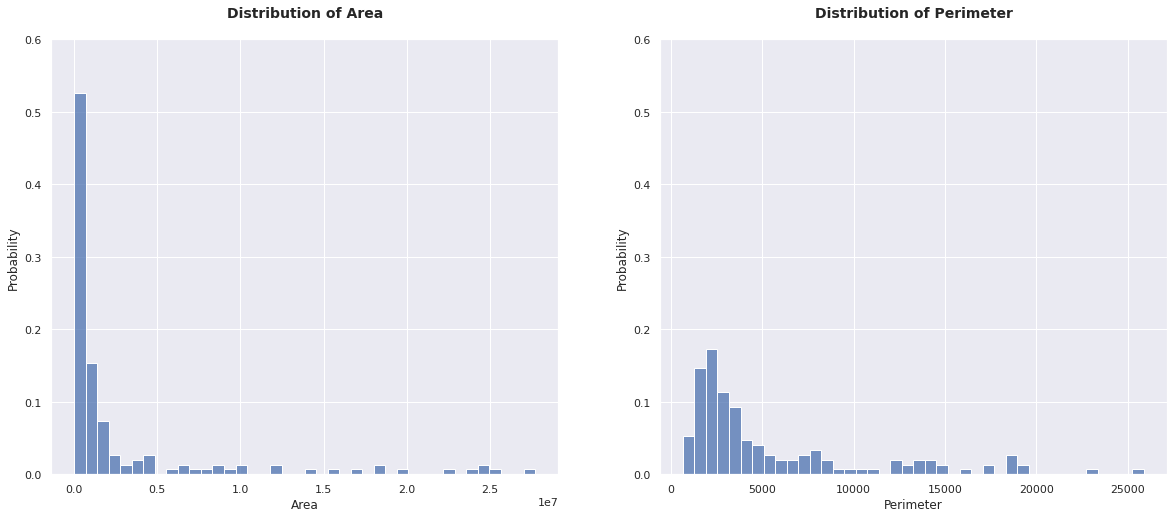

In [ ]:
# Setup figure
sns.set(rc={'figure.figsize':(20,8)})
fig, axs = plt.subplots(1, 2);
fig.subplots_adjust(hspace=1.2) # Adjust the horizontal space between the subplots

# Iterate over selected variables and display their distribution
for ax, var_name in zip(axs, ["area", "perimeter"]):

    # Plot the data
    sns.histplot(x=var_name, data = FEATURES_RAW, palette = sns.color_palette("flare"), ax = ax, stat = "probability", bins = 40)

    # Set y-label
    ax.set_ylabel("Probability")

    # Set y-limit so both graphs are comparable
    ax.set_ylim(0, 0.6)

    # Gets rid of underscore in the name - if needed
    var_name = ' '.join(var_name.split('_')).capitalize()

    # Set x-label
    ax.set_xlabel(var_name, size = 12)

    # Set the title
    ax.set_title(f"Distribution of {var_name}\n", size=14, weight = "bold")

<h3 style="color:green">Images</h3>
<h4 style="color:#ff9900">Use matplotlib.pyplot package to load an image and the corresponding segmentation. Display the images side by side (as subplots)</h4>

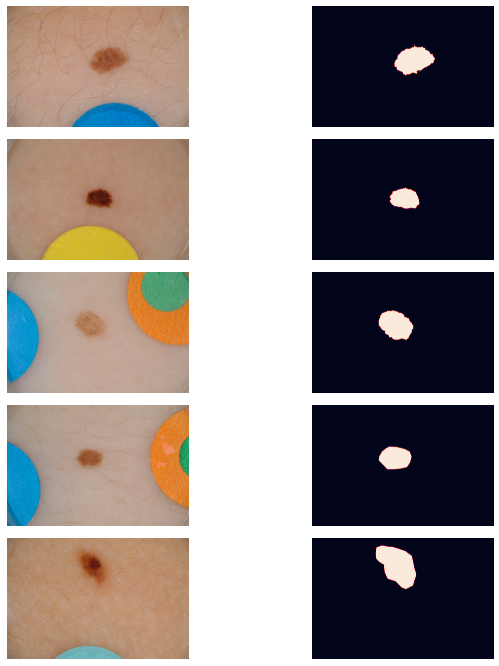

In [ ]:
# Specify how many images you want to see
number_of_images_to_see = 5

# Get image ids
image_id = list(GROUND_TRUTH_RAW["image_id"])

# Setup figure
fig, axs = plt.subplots(number_of_images_to_see, 2);
fig.set_size_inches(10, 12)
fig.subplots_adjust(hspace=0.1) # Adjust the horizontal space between the subplots

# Create subplots
index = 0
for row in axs:

    # Get both axs
    ax1, ax2 = row

    # Define filenames related to this image
    file_image = PATH_DATA["pictures-examples-raw"] + image_id[index] + '.jpg'
    file_mask = PATH_DATA["pictures-segment-raw"] + image_id[index] + '_segmentation.png'
    
    # Read the images with these filenames
    im = plt.imread(file_image)
    mask = plt.imread(file_mask)

    # Show the data
    ax1.imshow(im)
    ax2.imshow(mask)

    ax1.axis('off')
    ax2.axis('off')
    
    index += 1

<h4 style="color:#ff9900">Inspect the dimensions and values inside the images, what do you notice?</h4>
<p>We can see that both, the actual image and its mask, have the same resolution. However, more importantly, we can see that image is 3-dimensional, whereas the mask is 2-dimensional. In other words, the actual image is defined in terms of pixels defined by RGB (red-green-black --> each value from 0 to 255 representing the intensity of the color), however the mask is only 0 and 1. This means that the mask can be understood as a way of telling which pixels are relevant and which not.</p>

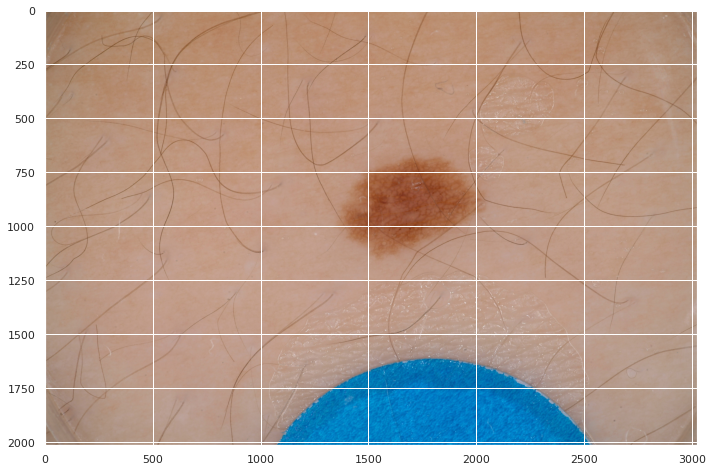

In [ ]:
# Get image object
file_image = PATH_DATA["pictures-examples-raw"] + FEATURES_RAW["id"][0] + '.jpg'
image = plt.imread(file_image)

# Show the image
plt.imshow(image);

In [ ]:
# Show the dimension and  example of a value
print(f"Dimension of the image is {image.shape} and example of one of its values is {image[0, 0]}.")

Dimension of the image is (2016, 3024, 3) and example of one of its values is [139 107  82].


In [ ]:
# Show the value from the area of a blue thing --> shows the blue color
image[1750, 1500]

array([  0, 102, 169], dtype=uint8)

Dimension of the mask is (2016, 3024) and example of one of its values is [0. 0. 0. ... 0. 0. 0.].


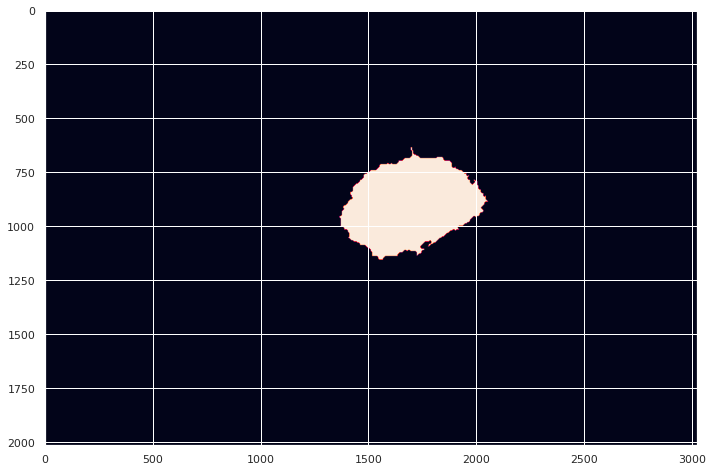

In [ ]:
# Get mask for the given image object
file_image = PATH_DATA["pictures-segment-raw"] + FEATURES_RAW["id"][0] + '_segmentation.png'
mask = plt.imread(file_image)

# Show the dimension and  example of a value
print(f"Dimension of the mask is {mask.shape} and example of one of its values is {mask[0]}.")
plt.imshow(mask);

<h4 style="color:#ff9900">How can you use the mask to measure the width or height of the skin lesion
at different points in the image? Can you now find the maximum width and
height? What about finding the maximum possible diameter of the lesion?</h4>

In [ ]:
def find_topbottom(mask):
    for index,row in enumerate(mask):
        if sum(row)>0:
            top = index
            break
    found = False
    for index,row in enumerate(mask[top:]):
        if sum(row)==0:
            bottom = index + top - 1
            found = True
            break
    if not found: # In case the 1s go all the way down to the bottom and therefore bottom is never assigned in the loop
        bottom = len(mask)-1 
    return top,bottom

In [ ]:
def find_leftright(mask):
    for index,column in enumerate(mask.T):
        if sum(column)>0:
            left = index
            break
    found = False
    for index,column in enumerate(mask.T[left:]):
        if sum(column)==0:
            right = index + left - 1
            found = True
            break
    if not found: # In case the 1s go all the way to the right and therefore right is never assigned in the loop
        right = len(mask.T)-1 
    return left,right

In [ ]:
top,bottom = find_topbottom(mask)
left,right = find_leftright(mask)

In [ ]:
# Problems with this approach: if there are 0s inbetween 1s 
max_width = 0
for index,row in enumerate(mask[top:bottom+1]):
    if sum(row)>max_width:
        max_width = int(sum(row))
        position_width = [index+top,-1,-1]

left_width = False
right_width = False
for index,value in enumerate(mask[position_width[0]][left:right+1]):
    if not left_width and value == 1: # Assigning left position when value == 1 and if not already assigned
        left_width = True
        position_width[1] = index + left
    elif left_width and not right_width and value == 0: # Only assigning right position when left is already assigned
        right_width = True
        position_width[2] = index + left - 1 # -1 because we index+left is at value == 0
if not right_width:
    right_width = len(mask.T)-1 # In case 1s go all the way to the right

print("Maxi theoretical width =",right - left + 1) # +1 because index starts at 0
print("Max width is {} pixels, at r = {}. Starting at c = {}, and ending at c = {}.".format(max_width,position_width[0],position_width[1],position_width[2]))


max_height = 0
for index,column in enumerate(mask.T[left:right+1]):
    if sum(column)>max_height:
        max_height = int(sum(column))
        position_height = [index+left,-1,-1]

top_height = False
bottom_height = False
for index,value in enumerate(mask.T[position_height[0]][top:bottom+1]):
    if not top_height and value == 1: # Assigning top position when value == 1 and if not already assigned
        top_height = True
        position_height[1] = index + top
    elif top_height and not bottom_height and value == 0: # Only assigning bottom position when top is already assigned
        bottom_height = True
        position_height[2] = index + top - 1 # -1 because we index+top is at value == 0
if not bottom_height:
    position_height[2] = len(mask)-1 # In case 1s go all the way down

print("Max theoretical height =",bottom-top + 1) # +1 because index starts at 0
print("Max height is {} pixels, at c = {}. Starting at r = {}, and ending at r = {}.".format(max_height,position_height[0],position_height[1],position_height[2]))


Maxi theoretical width = 688
Max width is 655 pixels, at r = 932. Starting at c = 1375, and ending at c = 2029.
Max theoretical height = 521
Max height is 469 pixels, at c = 1700. Starting at r = 648, and ending at r = 1116.


In [ ]:
# NO VALUE FOR EXERCISE, JUST TO REMEMBER ORDER IN "IFs" MATTERS
time1 = 0
time2 = 0
for i in range(0,1001):
    start_time = time.time()
    top_height = False
    bottom_height = False
    for index,value in enumerate(mask.T[position_height[0]][top:bottom+1]):
        if value == 1 and not top_height:
            top_height = True
            position_height[1] = index+top
        elif value == 0 and not bottom_height and top_height:
            bottom_height = True
            position_height[2] = index+top
    time1 += time.time() - start_time



    start_time = time.time()
    top_height = False
    bottom_height = False
    for index,value in enumerate(mask.T[position_height[0]][top:bottom+1]):
        if not top_height and value == 1:
            top_height = True
            position_height[1] = index+top
        elif top_height and not bottom_height and value == 0:
            bottom_height = True
            position_height[2] = index+top
    time2 += time.time() - start_time
print(time1,time2)

1.8271605968475342 0.9149196147918701


In [ ]:
def width_finder_point(point,mask,left,right):
    """
    point: list/tuple with column at first position and row at 2nd position
    mask: 2D numpy array of 1s and 0s
    left: integer, column where the first 1 appear
    right: integer, column where the last 1 appear
    return: integer, number of pixels of the width
    """
    counter = -1 # -1 because going on the point twice
    index = point[0]
    value = 1
    while value != 0 and index>=left:
        counter += 1
        index -= 1 # Danger on position of Index, if over or under value assignment, changes counter = -1 or -3 at beginning 
        value = mask[point[1]][index]
    index = point[0]
    value = 1
    while value !=0 and index<right:
        counter += 1
        index += 1 # Danger on position of Index, if over or under value assignment, changes counter = -1 or -3 at beginning 
        value = mask[point[1]][index]
    return counter

def height_finder_point(point,mask,top,bottom):
    """
    point: list/tuple with column at first position and row at 2nd position
    mask: 2D numpy array of 1s and 0s
    top: integer, row where the first 1 appear
    bottom: integer, row where the last 1 appear
    return: integer, number of pixels of the height
    """
    counter = -1 # Because we'll start at the point twice
    index = point[1]-top
    value = 1
    while value != 0 and index>=top:
        counter += 1
        index -= 1 # Danger on position of Index, if over or under value assignment, changes counter = -1 or -3 at beginning 
        value = mask[top:bottom+1][index][point[0]]
    index = point[1]-top
    value = 1
    while value !=0 and index<bottom-top: # new index from is from top to bottom, top = 0 and bottom = bottom - original top
        counter += 1
        index += 1 # Danger on position of Index, if over or under value assignment, changes counter = -1 or -3 at beginning 
        value = mask[top:bottom+1][index][point[0]]
    return counter

def width_finder_row(point,mask,left,right):
    """
    point: list/tuple with column at first position and row at 2nd position
    mask: 2D numpy array of 1s and 0s
    left: integer, column where the first 1 appear
    right: integer, column where the last 1 appear
    return: integer, number of pixels of the width
    """
    counter = 0
    for value in mask[point[1]][left:right+1]:
        if value == 1:
            counter += 1
    return counter

def height_finder_column(point,mask,top,bottom):
    """
    point: list/tuple with column at first position and row at 2nd position
    return: integer, number of pixels of the height
    """
    counter = 0
    for value in mask[top:bottom+1]:
        if value[point[0]] == 1:
            counter += 1
    return counter


In [ ]:
#TO FIND ALL BANDS OF 1s

#HEIGHT
counter = [0]
index_counter = 0
for index,value in enumerate(mask[top:bottom+1]): # 1740 is an arbitrary chosen column to show as example
    if value[1740] == 0 and mask[index-1+top][1740] == 0: # passes when it's a band of 0s
        pass
    elif value[1740] == 0 and mask[index-1+top][1740] != 0: # Band of 1s is over, we add a new counter in the list
        counter.append(0)
        index_counter += 1
    elif value[1740] == 1:
        counter[index_counter] += 1
if counter[-1] == 0: # Delete the last item when the rows ends with 0s
    counter.pop()    
print(counter)

#WIDTH
counter = [0]
index_counter = 0
for index,value in enumerate(mask[1080]): # 1080 is an arbitrary chosen row to show as example
    if value == 0 and mask[1080][index-1] == 0:
        pass
    elif value == 0 and mask[1080][index-1] != 0: # Band of 1s is over, we add a new counter in the list
        counter.append(0)
        index_counter += 1
    else:
        counter[index_counter] += 1 
if counter[-1] == 0: # Delete the last item when the rows ends with 0s
    counter.pop()    
print(counter)

[407, 25]
[297, 11]


In [ ]:
# This is the show the difference between the 2 height/width finders. 
# Both can have positive and negative effects (depending on how good the mask is) and how precise we want to be.
# Best could be to use the Point method, unless there is a difference of 20 (arbitrary) pixels with the R/C method,
    # which could trigger a warning, telling us to examine the image further, like with Point 3 and 5.

point_outside = [500,750,0] #[column,row,ID]
point_outside2 = [1500,250,1] 
point_outside3 = [1765,1080,2] 
point_inside = [1795,1080,3] 
point_inside2 = [1750,1080,4]
point_inside3 = [1745,1110,5] 
point_inside4 = [1745,1000,6]
list_points = [point_outside,point_outside2,point_outside3,point_inside,point_inside2,point_inside3,point_inside4]
for point in list_points:
    if (mask[point[1]][point[0]] == 0) or (point[0]<left or point[0]>right or point[1]<top or point[1]>bottom):
        print("\nPoint {} is outside the lesion area.".format(point[2]))
    else:
        print("\nFor point {}:".format(point[2]))
        print("Point method: the width is {} pixels, and the height is {} pixels.".format(width_finder_point(point,mask,left,right),height_finder_point(point,mask,top,bottom)))
        print("R/C method: the width is {} pixels, and the height is {} pixels.".format(width_finder_row(point,mask,left,right),height_finder_column(point,mask,top,bottom)))         


Point 0 is outside the lesion area.

Point 1 is outside the lesion area.

Point 2 is outside the lesion area.

For point 3:
Point method: the width is 11 pixels, and the height is 2 pixels.
R/C method: the width is 308 pixels, and the height is 397 pixels.

For point 4:
Point method: the width is 297 pixels, and the height is 2 pixels.
R/C method: the width is 308 pixels, and the height is 403 pixels.

For point 5:
Point method: the width is 248 pixels, and the height is 5 pixels.
R/C method: the width is 248 pixels, and the height is 412 pixels.

For point 6:
Point method: the width is 548 pixels, and the height is 87 pixels.
R/C method: the width is 548 pixels, and the height is 412 pixels.


<h4 style="color:#ff9900">Use the segmentation to mask out / erase the outside of the skin lesion. Can
you do this without a for loop?</h4>

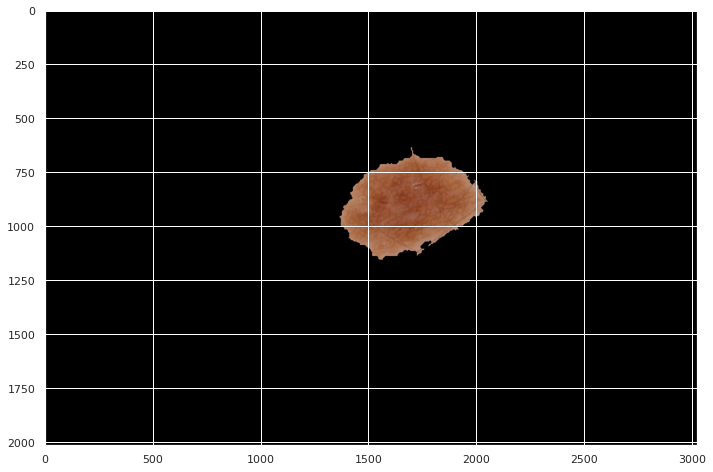

In [ ]:
# Make a new image which you will then transform
adjusted_image = image.copy()

# Set all other values to 0 --> black
adjusted_image[~np.array(mask, dtype=bool)] = 0

# Show the adjusted image
plt.imshow(adjusted_image);

<h4 style="color:#ff9900">Try to extract the color of a single pixel inside the lesion, and store this
color. Can you now fill the entire lesion, just with this color?</h4>

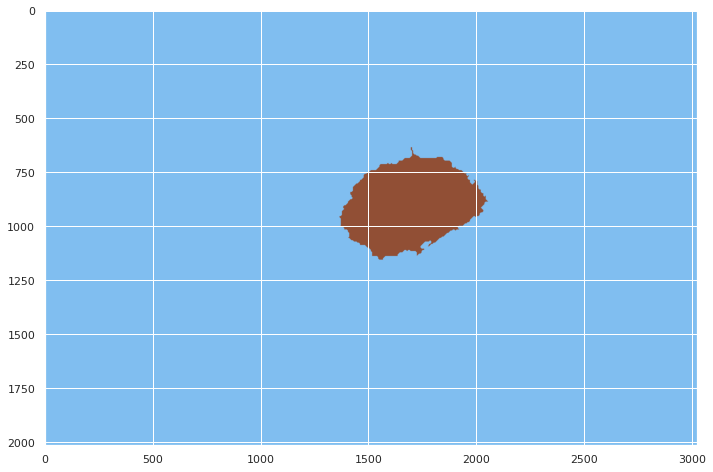

In [ ]:
# Sample a color --> from center
sample_color = image[(top + bottom)//2, (right + left)//2]

# Make a new image which you will then transform
adjusted_image2 = image.copy()

# Set all selected values to given color
adjusted_image2[np.array(mask, dtype=bool)] = sample_color

# Set all other values to some other color
adjusted_image2[~np.array(mask, dtype=bool)] = (128, 190, 240)

# Show the adjusted image
plt.imshow(adjusted_image2);

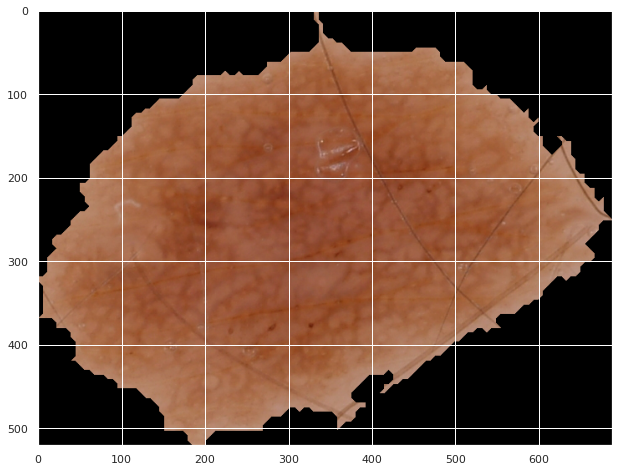

In [ ]:

plt.imshow(adjusted_image[top:bottom+1,left:right+1])



In [ ]:
adjusted_image.shape

NameError: name 'adjusted_image' is not defined

Felzenszwalb number of segments: 127
SLIC number of segments: 223
Quickshift number of segments: 1683


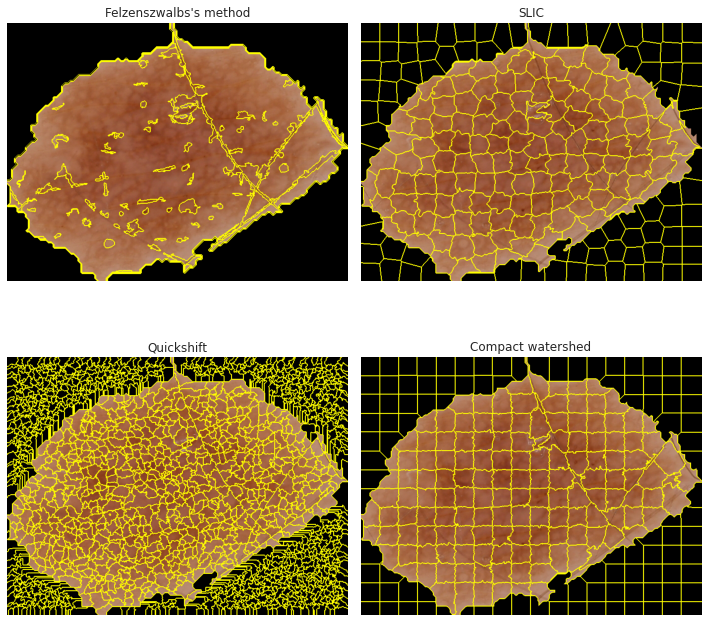

In [ ]:
#https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = adjusted_image[top:bottom+1,left:right+1]
segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1,
                     start_label=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

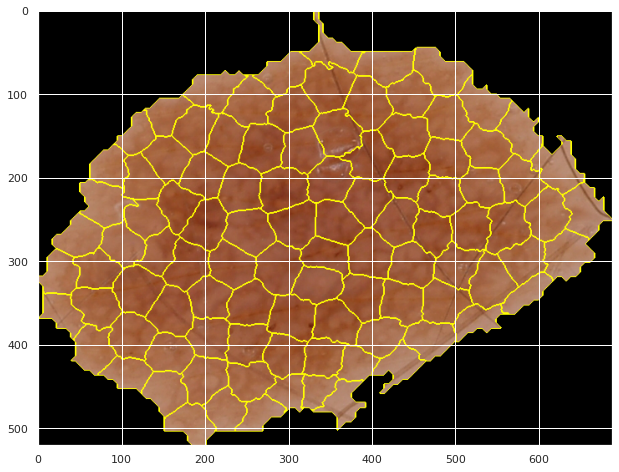

In [ ]:
img = adjusted_image[top:bottom+1,left:right+1]
msk = mask[top:bottom+1,left:right+1]
segments_slic = slic(img,mask=msk, n_segments=100, compactness=10, sigma=1,
                     start_label=1)
plt.imshow(mark_boundaries(img, segments_slic))

In [ ]:
#https://stackoverflow.com/questions/41578473/how-to-calculate-average-color-of-a-superpixel-in-scikit-image
from skimage import measure

regions = measure.regionprops(segments_slic, intensity_image=img)

some_area = [r.area for r in regions]
mean_intens = [r.mean_intensity for r in regions]
min_R = min(mean_intens[:][0])
min_G = min(mean_intens[:][1])
min_B = min(mean_intens[:][2])
max_R = max(mean_intens[:][0])
max_G = max(mean_intens[:][1])
max_B = max(mean_intens[:][2])
mean_R = np.mean(mean_intens[:][0])
mean_G = np.mean(mean_intens[:][1])
mean_B = np.mean(mean_intens[:][2])
print(min_R,min_G,min_B)
print(max_R,max_G,max_B)
print(mean_R,mean_G,mean_B)

91.12761276127613 85.11284788410217 85.1521164021164
175.2915291529153 176.15211589782692 174.72927689594357
129.38668866886687 126.74418604651163 125.80790711346266


In [ ]:
from skimage import measure
ground_truth = pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['ex_ground_truth']}")
ground_truth = ground_truth
list_keratosis = [ground_truth.loc[i,'image_id'] for i in ground_truth.index if ground_truth.loc[i,'seborrheic_keratosis']==1]
list_melanoma = [ground_truth.loc[i,'image_id'] for i in ground_truth.index if ground_truth.loc[i,'melanoma']==1]
list_healthy = [ground_truth.loc[i,'image_id'] for i in ground_truth.index if (ground_truth.loc[i,'melanoma']==0 and ground_truth.loc[i,'seborrheic_keratosis']==0)]
print(len(list_keratosis))
print(len(list_melanoma))
print(len(list_healthy))
print(len(list_keratosis)+len(list_melanoma)+len(list_healthy)==150)


42
30
78
True


In [ ]:
dict_RGB = {letter:{summary:[] for summary in ["Min","Mean","Max"]} for letter in "RGB"}

for image_id in list_keratosis:
    print("We're in",image_id,"now.")
    image_path = PATH_DATA["pictures-examples-raw"] + image_id + '.jpg'
    mask_path = PATH_DATA["pictures-segment-raw"] + image_id + '_segmentation.png'
    image = plt.imread(image_path)
    mask = plt.imread(mask_path)
    adjusted_image = image.copy()
    adjusted_image[~np.array(mask, dtype=bool)] = 0
    top, bottom = find_topbottom(mask)
    left, right = find_leftright(mask)
    adjusted_image = adjusted_image[top:bottom+1,left:right+1]
    mask = mask[top:bottom+1,left:right+1]
    segments_slic = slic(adjusted_image,mask=mask, n_segments=100, compactness=10, sigma=1, start_label=1)
    regions = measure.regionprops(segments_slic, intensity_image=adjusted_image)
    mean_intens = [r.mean_intensity for r in regions]
    for letter in "RGB":
        dict_RGB[letter]["Min"].append(min(mean_intens[:]["RGB".index(letter)]))
        dict_RGB[letter]["Mean"].append(np.mean(mean_intens[:]["RGB".index(letter)]))
        dict_RGB[letter]["Max"].append(max(mean_intens[:]["RGB".index(letter)]))

We're in ISIC_0012143 now.
We're in ISIC_0012204 now.
We're in ISIC_0012210 now.
We're in ISIC_0012254 now.
We're in ISIC_0012380 now.
We're in ISIC_0012383 now.
We're in ISIC_0012417 now.
We're in ISIC_0012492 now.
We're in ISIC_0012513 now.
We're in ISIC_0012720 now.
We're in ISIC_0012927 now.
We're in ISIC_0012959 now.
We're in ISIC_0013127 now.
We're in ISIC_0013215 now.
We're in ISIC_0013421 now.
We're in ISIC_0013632 now.
We're in ISIC_0013637 now.
We're in ISIC_0013863 now.
We're in ISIC_0013945 now.
We're in ISIC_0014038 now.
We're in ISIC_0014055 now.
We're in ISIC_0014139 now.
We're in ISIC_0014212 now.
We're in ISIC_0014310 now.
We're in ISIC_0014382 now.
We're in ISIC_0014568 now.
We're in ISIC_0014572 now.
We're in ISIC_0014597 now.
We're in ISIC_0014601 now.
We're in ISIC_0014608 now.
We're in ISIC_0014610 now.
We're in ISIC_0014611 now.
We're in ISIC_0014616 now.
We're in ISIC_0014618 now.
We're in ISIC_0014620 now.
We're in ISIC_0014623 now.
We're in ISIC_0014624 now.
W

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In (minimum, mean, maximum)<br>
<br>
Keratosis:<br>
Rmin: (44.892135291408685, 118.78653532723736, 177.7102908277405)<br>
Rmean: (85.10716539596446, 145.72434884891555, 194.67224744608401)<br>
Rmax: (124.83020750199522, 180.58830187449573, 231.76279175853418)<br>
<br>
Gmin: (28.97352381636096, 115.72877758572584, 171.97719298245613)<br>
Gmean: (34.844030454949724, 143.03292495564438, 189.7769089390142)<br>
Gmax: (43.96218576881199, 178.63085604619042, 214.57838073761548)<br>
<br>
Bmin: (26.027081414484453, 116.83147700390366, 175.94328703703704)<br>
Bmean: (36.38746851632786, 143.0649520262078, 190.2778777536457)<br>
Bmax: (51.49194410857011, 177.8660088553774, 231.82184300341297)<br>
<br>
Healthy:<br>
Rmin: (39.97497621706581, 110.43810557956444, 200.91439442868776)<br>
Rmean: (71.50138413939098, 138.7496464710199, 211.79089560341842)<br>
Rmax: (93.67635564240352, 174.19628083298798, 248.71931347025358)<br>
<br>
Gmin: (46.42926887354132, 107.91549455022385, 196.76911024367647)<br>
Gmean: (74.71803977272727, 137.24478794711968, 210.60198374581896)<br>
Gmax: (105.37180397727273, 174.1176793944745, 246.15771214575364)<br>
<br>
Bmin: (39.172254335260114, 107.05331768387394, 195.65648441519755)<br>
Bmean: (72.85529881521241, 136.17685853590189, 209.51973713904007)<br>
Bmax: (108.9374877266479, 172.91785796741513, 247.80998876302124)<br>

In [ ]:
from skimage import color

final_2000_healthy = []
counter = 1
start_time = time.time()
for image_id in list_healthy:
    print(counter,"/",len(list_healthy))
    counter += 1
    image_path = PATH_DATA["pictures-examples-raw"] + image_id + '.jpg'
    mask_path = PATH_DATA["pictures-segment-raw"] + image_id + '_segmentation.png'
    image = plt.imread(image_path)
    if image.shape[0]*image.shape[1]>29040000: # This is to avoid the biggest files, from 9min down to 2min, missing out on 14 images
                                               # The list that I gave with the fifthtiles were with the full list
        pass
    else:
        mask = plt.imread(mask_path)
        adjusted_image = image.copy()
        adjusted_image[~np.array(mask, dtype=bool)] = 0
        borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
        top, bottom, left, right = min(borders[0]), max(borders[0]), min(borders[1]), max(borders[1])
        adjusted_image = adjusted_image[top:bottom+1,left:right+1]
        mask = mask[top:bottom+1,left:right+1]
        segments_slic = slic(adjusted_image,mask=mask, n_segments=500, compactness=10, sigma=1, start_label=1)
        regions = measure.regionprops(segments_slic, intensity_image=adjusted_image)
        mean_intens = [r.mean_intensity for r in regions]


        mean_R = np.mean(mean_intens[:][0])
        mean_G = np.mean(mean_intens[:][1])
        mean_B = np.mean(mean_intens[:][2])
        mean_all = [mean_R,mean_G,mean_B]
        mean_all_lab = color.rgb2lab(mean_all)
        list_2000 = []
        for r in mean_intens[1:]:
            lablab = color.rgb2lab(r)
            list_2000.append(color.deltaE_ciede2000(mean_all_lab,lablab))
            list_cmc.append(color.deltaE_cmc(mean_all_lab,lablab))
        final_2000_healthy.append(max(list_2000)-min(list_2000))
    
print("It took {}seconds.".format(time.time() - start_time))

In [ ]:
final_2000_keratosis = []
counter = 1
start_time = time.time()
for image_id in list_keratosis:
    print(counter,"/",len(list_keratosis))
    counter += 1
    image_path = PATH_DATA["pictures-examples-raw"] + image_id + '.jpg'
    mask_path = PATH_DATA["pictures-segment-raw"] + image_id + '_segmentation.png'
    image = plt.imread(image_path)
    if image.shape[0]*image.shape[1]>29040000: # This is to avoid the biggest files, gaining around 1min
        pass
    else:
        mask = plt.imread(mask_path)
        adjusted_image = image.copy()
        adjusted_image[~np.array(mask, dtype=bool)] = 0
        borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
        top, bottom, left, right = min(borders[0]), max(borders[0]), min(borders[1]), max(borders[1])
        adjusted_image = adjusted_image[top:bottom+1,left:right+1]
        mask = mask[top:bottom+1,left:right+1]
        segments_slic = slic(adjusted_image,mask=mask, n_segments=500, compactness=10, sigma=1, start_label=1)
        regions = measure.regionprops(segments_slic, intensity_image=adjusted_image)
        mean_intens = [r.mean_intensity for r in regions]

        mean_R = np.mean(mean_intens[:][0])
        mean_G = np.mean(mean_intens[:][1])
        mean_B = np.mean(mean_intens[:][2])
        mean_all = [mean_R,mean_G,mean_B]
        mean_all_lab = color.rgb2lab(mean_all)
        list_2000 = []
        for r in mean_intens[1:]:
            lablab = color.rgb2lab(r)
            list_2000.append(color.deltaE_ciede2000(mean_all_lab,lablab))
        final_2000_keratosis.append(max(list_2000)-min(list_2000))

print("It took {}seconds.".format(time.time() - start_time))

In [ ]:
for i in range(1,5):
    print(str(i)+"/5:",final_2000_healthy[int((len(final_2000_healthy)/5)*i)])

for i in range(1,5):
    print(str(i)+"/5:",final_2000_keratosis[int((len(final_2000_keratosis)/5)*i)])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a47fbf6-c653-4328-90db-f0771def66a6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>